In [1]:
from keras.applications import vgg16, vgg19, ResNet50
from tensorflow.keras.utils import load_img,img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input

from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

In [ ]:
!unzip book_covers.zip

# Cargamos VGG16 pre-entrenada en ImageNet


In [3]:
# del práctico 4
modelo_escogido = 'vgg16'

if modelo_escogido == 'vgg16':
  # cargar modelo
  vgg_model = vgg16.VGG16(weights='imagenet')
  # quitar la capa de clasificacion
  feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)
  # vemos resumen de la arquitectura del modelo
  feat_extractor.summary()

elif modelo_escogido == 'vgg19':
  # cargar modelo
  vgg19_model = vgg19.VGG19(weights='imagenet')
  # quitar la capa de clasificacion
  feat_extractor = Model(inputs=vgg19_model.input, outputs=vgg19_model.get_layer("fc2").output)
  # vemos resumen de la arquitectura del modelo
  feat_extractor.summary()



553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 25s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 134,260,544 (512.16 MB)

 Non-trainable params: 0 (0.00 B)

## Procesamiento de imágenes

In [4]:
imgs_path = "content/book_covers/" # ruta de carpeta con portadas

# tamaño del input layer de la red
imgs_model_width, imgs_model_height = 224, 224

nb_closest_images = 10 # cantidad de libros a recomendar

In [5]:
files = [imgs_path + x for x in os.listdir(imgs_path) if "jpg" in x]
print("total de imagenes:",len(files))

total de imagenes: 4287


In [7]:
# vamos a procesar cada imagen de portada, cambiándole el tamaño al del input de la red
# y luego pasarla por la red para obtener los features (vectores de 4096 dimensiones) que crea la red
importedImages = []
imgs_features = []
# procesamos por batches si no se llena la memoria
file_batch_size = 500
n_batches = len(files) // file_batch_size
print(f"No. of batches: {n_batches}")

for i, f in enumerate(files):
    filename = f
    original = load_img(filename, target_size=(224, 224))
    numpy_image = img_to_array(original)
    image_batch = np.expand_dims(numpy_image, axis=0)

    importedImages.append(image_batch)

    if i > 0 and i % file_batch_size == 0:
      images = np.vstack(importedImages)
      importedImages = []

      processed_imgs = preprocess_input(images.copy())
      # obtenemos los features para cada imagen del batch con la CNN
      batch_imgs_features = feat_extractor.predict(processed_imgs, batch_size=8)
      print(f"batch {i // file_batch_size} features extracted!")

      imgs_features.append(batch_imgs_features)

# process remaining images
if len(importedImages) > 0:
    images = np.vstack(importedImages)
    processed_imgs = preprocess_input(images.copy())
    # obtenemos los features para cada imagen del batch con la CNN
    batch_imgs_features = feat_extractor.predict(processed_imgs, batch_size=8)
    print(f"remaining images features extracted!")

    imgs_features.append(batch_imgs_features)


No. of batches: 8
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step
batch 1 features extracted!
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step
batch 2 features extracted!
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step
batch 3 features extracted!
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step
batch 4 features extracted!
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step
batch 5 features extracted!
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step
batch 6 features extracted!
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step
batch 7 features extracted!
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step
batch 8 features extracted!
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step
remaining images features extracted!


In [8]:
# join all subarrays of imgs_features
imgs_features = np.concatenate(imgs_features, axis=0)
print(imgs_features.shape)

(4287, 4096)


In [9]:
# computa similaridad coseno entre cada par de features de portadas
cosSimilarities = cosine_similarity(imgs_features)

# guardamos los resultados en un dataframe
cos_similarities_df = pd.DataFrame(cosSimilarities, columns=files, index=files)
cos_similarities_df #.head()

,content/book_covers/book_1615.jpg,content/book_covers/book_3710.jpg,content/book_covers/book_315.jpg,content/book_covers/book_1898.jpg,content/book_covers/book_4142.jpg,content/book_covers/book_970.jpg,content/book_covers/book_4209.jpg,content/book_covers/book_937.jpg,content/book_covers/book_1083.jpg,content/book_covers/book_4104.jpg,...,content/book_covers/book_2683.jpg,content/book_covers/book_1380.jpg,content/book_covers/book_1272.jpg,content/book_covers/book_595.jpg,content/book_covers/book_3368.jpg,content/book_covers/book_1195.jpg,content/book_covers/book_4207.jpg,content/book_covers/book_3325.jpg,content/book_covers/book_1895.jpg,content/book_covers/book_1154.jpg
content/book_covers/book_1615.jpg,1.000000,0.448588,0.362402,0.355645,0.350963,0.275678,0.391687,0.311637,0.360908,0.474497,...,0.321895,0.312139,0.297709,0.405875,0.271914,0.279312,0.343515,0.460245,0.388578,0.352081
content/book_covers/book_3710.jpg,0.448588,1.000000,0.295166,0.389631,0.246413,0.280007,0.444897,0.256121,0.376516,0.331880,...,0.294384,0.332999,0.419214,0.275277,0.323774,0.249887,0.331589,0.303997,0.345677,0.286361
content/book_covers/book_315.jpg,0.362402,0.295166,1.000000,0.208657,0.254485,0.240117,0.339461,0.216157,0.171994,0.266133,...,0.233582,0.262204,0.226448,0.290999,0.264729,0.259637,0.389208,0.269640,0.184936,0.191637
content/book_covers/book_1898.jpg,0.355645,0.389631,0.208657,1.000000,0.218051,0.272436,0.438096,0.222236,0.533279,0.380680,...,0.455249,0.380979,0.378998,0.296307,0.278253,0.394757,0.447065,0.378232,0.284394,0.361369
content/book_covers/book_4142.jpg,0.350963,0.246413,0.254485,0.218051,1.000000,0.268124,0.261198,0.404624,0.243807,0.359770,...,0.260080,0.383028,0.298876,0.404536,0.227694,0.380430,0.255973,0.335212,0.404211,0.310617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
content/book_covers/book_1195.jpg,0.279312,0.249887,0.259637,0.394757,0.380430,0.311717,0.356161,0.359768,0.412851,0.375300,...,0.553494,0.580489,0.406758,0.329854,0.255184,1.000000,0.373218,0.384080,0.360393,0.397512
content/book_covers/book_4207.jpg,0.343515,0.331589,0.389208,0.447065,0.255973,0.376012,0.324111,0.325887,0.331198,0.462244,...,0.433671,0.341976,0.303448,0.340008,0.254983,0.373218,1.000000,0.432540,0.371149,0.335756
content/book_covers/book_3325.jpg,0.460245,0.303997,0.269640,0.378232,0.335212,0.312030,0.332197,0.328798,0.347026,0.464107,...,0.388703,0.495812,0.358683,0.507015,0.182379,0.384080,0.432540,1.000000,0.360122,0.482643
content/book_covers/book_1895.jpg,0.388578,0.345677,0.184936,0.284394,0.404211,0.321823,0.334124,0.352159,0.383891,0.397287,...,0.303285,0.317568,0.419560,0.353871,0.334492,0.360393,0.371149,0.360122,1.000000,0.367958


In [10]:
# esta funcion imprime las portadas más similares a la dada
def retrieve_most_similar_products(given_img, nb_closest_images=10):

    print("-----------------------------------------------------------------------")
    print("libro escogido:")

    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()

    print("-----------------------------------------------------------------------")
    print("libros más similares:")

    closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1].index
    closest_imgs_scores = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1]

    for i in range(0,len(closest_imgs)):
        original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(original)
        plt.show()
        print("score de similaridad : ",closest_imgs_scores[i])

# esta devuelve las nb_closest_images portadas y sus similitudes del coseno
def recommend(given_index, nb_closest_images=10):

    closest_imgs = cos_similarities_df[given_index].sort_values(ascending=False)[1:nb_closest_images+1].index
    closest_imgs_scores = cos_similarities_df[given_index].sort_values(ascending=False)[1:nb_closest_images+1]

    closest_imgs = closest_imgs.to_numpy()
    closest_imgs_scores = closest_imgs_scores.to_numpy()
    # creamos el array con pares (filename, score)
    recs = [(img, score) for img, score in zip(closest_imgs, closest_imgs_scores)]

    return recs

2240
content/book_covers/book_1952.jpg
-----------------------------------------------------------------------
libro escogido:


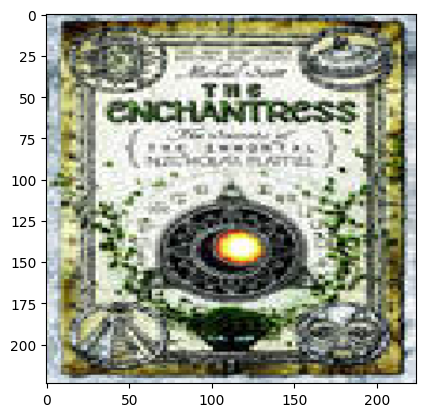

-----------------------------------------------------------------------
libros más similares:


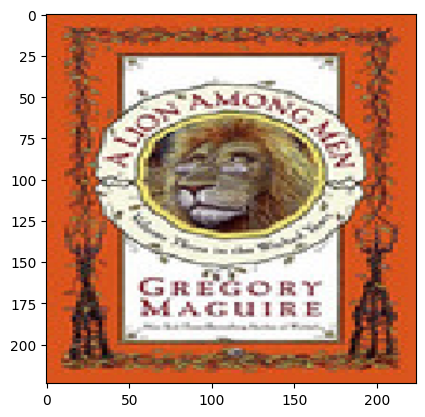

score de similaridad :  0.6449852


<ipython-input-11-45e7e6c281d9>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("score de similaridad : ",closest_imgs_scores[i])


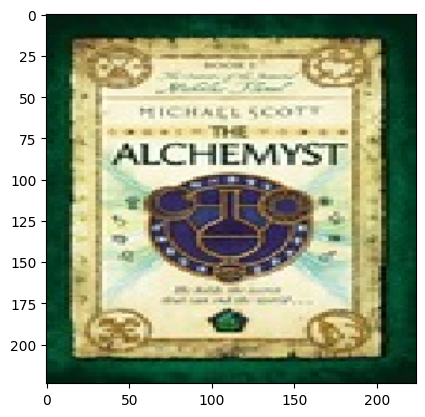

score de similaridad :  0.6381983


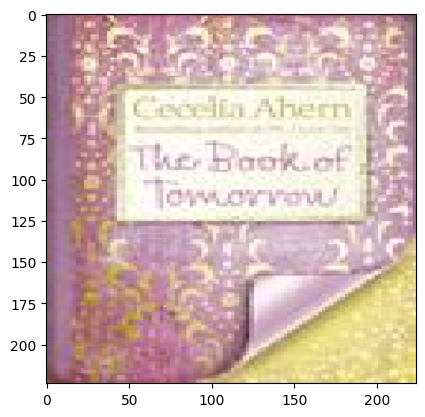

score de similaridad :  0.6186454


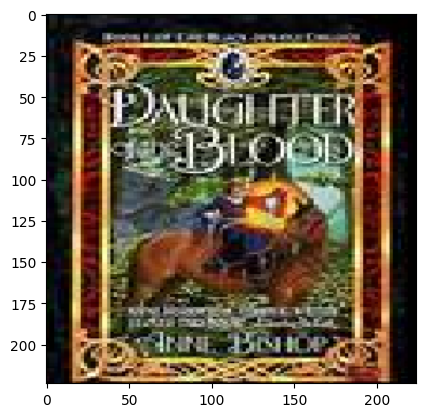

score de similaridad :  0.6098831


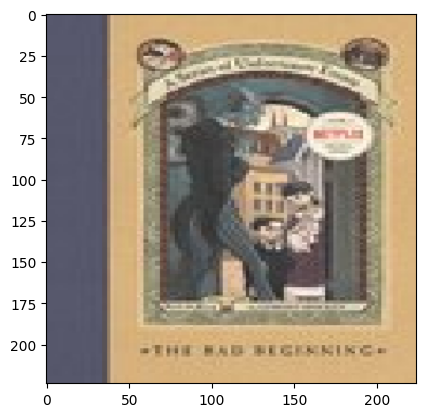

score de similaridad :  0.6009459


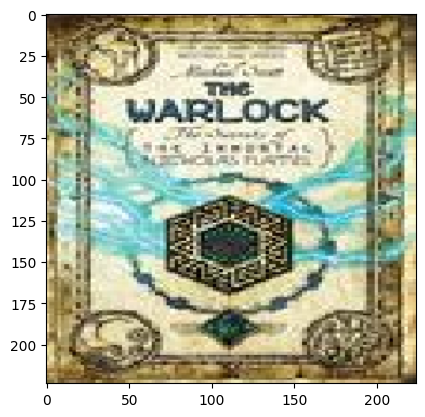

score de similaridad :  0.5808946


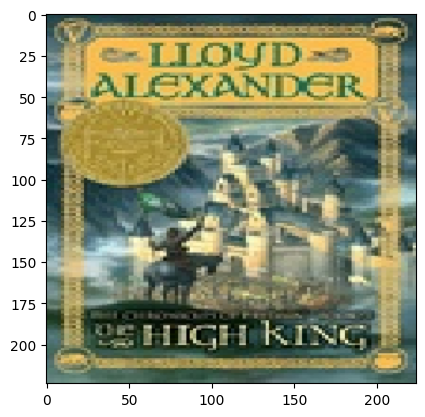

score de similaridad :  0.5787032


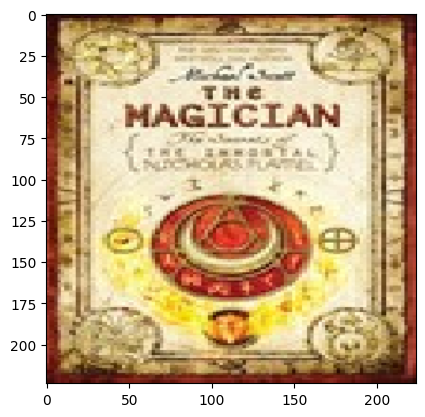

score de similaridad :  0.5781107


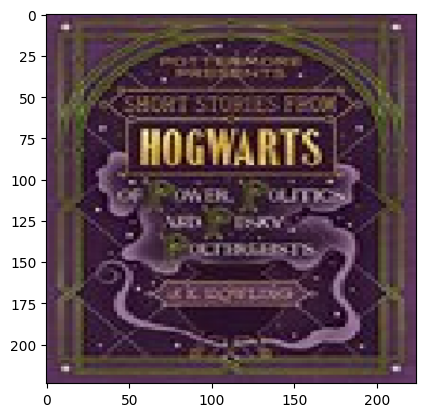

score de similaridad :  0.56663483


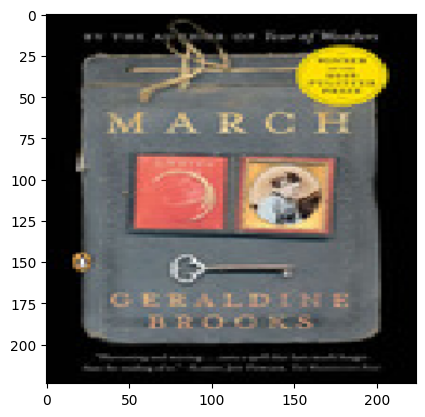

score de similaridad :  0.56435233


In [ ]:
idx = random.randint(0, len(files))
print(idx)
idx_recs = recommend(files[idx])
print(files[idx])
retrieve_most_similar_products(files[idx])

In [ ]:
print(idx_recs[0], idx_recs[0][0])
idx_0 = int(idx_recs[0][0].strip('content/book_covers/').strip('.jpg'))
print(idx_0)

('content/book_covers/book_2624.jpg', np.float32(0.6449852)) content/book_covers/book_2624.jpg
2624


In [ ]:
set([('content/book_covers/book_3006.jpg', np.float32(0.58404464)), ('content/book_covers/book_3006.jpg', np.float32(0.58404464))])

{('content/book_covers/book_3006.jpg', np.float32(0.58404464))}

# Cargar datos de libros

In [11]:
!wget https://www.dropbox.com/s/57tel5zqopkssrh/books.csv?dl=0 -O books.csv
!wget https://www.dropbox.com/s/zpnnoy1i8ljf9fg/goodreads_bert_embeddings.npy?dl=0 -O goodreads_bert_embeddings.npy
!wget https://www.dropbox.com/s/dqeqpsr0vdvmcy0/goodreads_past_interactions.json?dl=0 -O goodreads_past_interactions.json
!wget https://www.dropbox.com/s/rjtzhmb2zbpp30q/goodreads_test_interactions.json?dl=0 -O goodreads_test_interactions.json

--2025-06-06 17:28:16--  https://www.dropbox.com/s/57tel5zqopkssrh/books.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/5s6xrfnu17yi34sfhmskb/books.csv?rlkey=ymzokbyqw3qq2bq5okfao9w1z&dl=0 [following]
--2025-06-06 17:28:16--  https://www.dropbox.com/scl/fi/5s6xrfnu17yi34sfhmskb/books.csv?rlkey=ymzokbyqw3qq2bq5okfao9w1z&dl=0
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc06f5add01d5a012e3134aebd66.dl.dropboxusercontent.com/cd/0/inline/CrFlH6zM6CPWwu-SEtTRrpBulUqYbMTwcObhbh_HSnNga0iiLp23nFLmzcR5inMTdYXvPV6OjNpSQud9d0798cpK_Ep5GMwVRtQ5dRz48brde1NYW0ksScmakvmIpnbifglPHD-fo29FFoLSSU8SN7Ju/file# [following]
--2025-06-06 17:28:16--  https://uc06f5add01d5a012e3134aebd66.dl.dropboxusercontent.com/cd/0

Creamos los diccionarios que convierten user_id en su índice de los arreglos y al revés.

In [12]:
df_books = pd.read_csv('books.csv', sep=',')

idx2bookid = {i: id_ for i, id_ in enumerate(df_books.book_id)}
bookid2idx = {id_:i for i, id_ in enumerate(df_books.book_id)}

In [13]:
import json
with open("goodreads_past_interactions.json", "r") as f:
    user_interactions = json.load(f)

idx2userid = {i: id_ for i, id_ in enumerate(user_interactions.keys())}
userid2idx = {id_:i for i, id_ in enumerate(user_interactions.keys())}

In [14]:
with open("goodreads_test_interactions.json", "r") as f:
    user_interactions_test = json.load(f)

Ahora cargamos los embeddings generados por BERT

In [15]:
bert_embeddings = np.load("goodreads_bert_embeddings.npy")  # shape: (num_items, embedding_dim)

num_items, embedding_dim = bert_embeddings.shape

print(bert_embeddings.shape)

(4287, 768)


## Crear datos de entrenamiento y testeo

In [37]:
from scipy.sparse import coo_matrix
rows = []
cols = []
data = []

for user_id, book_ids in user_interactions.items():
    for book_id in book_ids:
        u_id = userid2idx[user_id]
        b_id = bookid2idx[book_id]
        rows.append(int(u_id))
        cols.append(int(b_id))
        data.append(1)

max_user_id = max(rows)
max_item_id = max(cols)

# Crear matriz sparse
user_item_matrix_train = coo_matrix((data, (rows, cols)), shape=(max_user_id + 1, max_item_id + 1))
print(user_item_matrix_train.shape)

rows_test = []
cols_test = []
data_test = []

for user_id, book_ids in user_interactions_test.items():
    for book_id in book_ids:
        u_id = userid2idx[user_id]
        b_id = bookid2idx[book_id]
        rows_test.append(int(u_id))
        cols_test.append(int(b_id))
        data_test.append(1)

max_user_id = max([max_user_id] + rows_test)
max_item_id = max([max_item_id] + cols_test)

test_users = list(set(rows_test))

# Crear matriz sparse
user_item_matrix_test = coo_matrix((data_test, (rows_test, cols_test)), shape=(max_user_id + 1, max_item_id + 1))
print(user_item_matrix_test.shape)

(52821, 4287)
(52821, 4287)


# Crear user features

El user feature es

$$ e_u =  \sum_{b \in B_u} \frac{e_b}{|B_u|} $$

In [18]:
user_features = {}
for user in user_interactions_test:
  user_books = user_interactions_test[user]
  user_embedding = np.zeros(embedding_dim)
  for book in user_books:
    book_embedding = bert_embeddings[bookid2idx[book]]
    user_embedding += book_embedding
  user_embedding /= len(user_books)
  user_features[user] = user_embedding

Repetimos lo que hicimos con las imágenes, pero ahora las similitudes son entre cada usuario (el embedding que acabamos de generar) y cada libro (su embedding de BERT).

In [19]:
# computa similaridad coseno entre los features de los usuarios y de las imagenes
user_cosSimilarities = cosine_similarity(list(user_features.values()), bert_embeddings)
index = [int(key) for key in user_features.keys()]
columns = [i for i in range(num_items)]
# guardamos los resultados en un dataframe
user_cos_similarities_df = pd.DataFrame(user_cosSimilarities, columns=columns, index=index)
user_cos_similarities_df.head()

,0,1,2,3,4,5,6,7,8,9,...,4277,4278,4279,4280,4281,4282,4283,4284,4285,4286
46133,0.753954,0.850082,0.833874,0.756176,0.670433,0.802925,0.738044,0.844914,0.412772,0.817329,...,0.427175,0.634435,0.602626,0.789471,0.801836,0.686593,0.864125,0.817915,0.755301,0.788550
53292,0.774814,0.820615,0.831644,0.781797,0.676736,0.810208,0.774393,0.850866,0.425854,0.828063,...,0.456880,0.731484,0.724436,0.835722,0.798235,0.784807,0.840190,0.820599,0.755335,0.804349
13282,0.791928,0.874611,0.852630,0.807019,0.683598,0.814306,0.778799,0.875936,0.410343,0.829180,...,0.412885,0.635294,0.599902,0.823644,0.800122,0.671799,0.872364,0.831378,0.770677,0.818972
45554,0.804973,0.793223,0.847772,0.837590,0.742636,0.819781,0.796377,0.883373,0.436543,0.822257,...,0.468275,0.728782,0.722653,0.883595,0.800005,0.790286,0.800280,0.794978,0.800809,0.804315
31001,0.793017,0.816038,0.877449,0.825213,0.750661,0.825792,0.819726,0.887446,0.574333,0.828076,...,0.557633,0.674695,0.651635,0.848678,0.826509,0.752156,0.820352,0.810577,0.816188,0.820161


## Recomendar usando user features

In [39]:
def embeddings_rec_func(users, N=10):
  recs = []
  for user in users:
    user = idx2userid[user]
    past_interactions = user_interactions[user]
    user_recs = []
    rec_tuples = set()
    # obtener libros similares para cada libro
    # con el que el usuario ha interactuado anteriormente
    for book_id in past_interactions:
      book_idx = bookid2idx[book_id]
      results = set(recommend(files[book_idx])) # para sacar duplicados
      rec_tuples = rec_tuples.union(results)
    rec_tuples = list(rec_tuples)
    # ahora quedarnos con los mas parecidos por embeddings
    sims = list(map(lambda x: convert_tuple(user, x), rec_tuples))
    sims.sort(key=lambda x: x[1], reverse=True)
    sims = sims[:nb_closest_images]
    for sim in sims:
      user_recs.append(sim[0])
    recs.append(user_recs)
  return recs

## Recomendar usando features combinados

Ahora concatenaremos los features de las imágenes con los embeddings de BERT.

In [23]:
# creamos features nuevos, donde para cada libro tenemos
# embedding = (image_features, bert_embeddings)
book_combined_embeddings = np.concatenate((imgs_features, bert_embeddings), axis=1)
print(book_combined_embeddings.shape)

(4287, 4864)


Creamos los embeddings/features de cada usuario al igual que antes, pero ahora $e_b$ representa el vector concatenado.

In [24]:
user_combined_features = {}
for user in user_interactions_test:
  user_books = user_interactions_test[user]
  user_embedding = np.zeros(embedding_dim + 4096) # nueva dimensión del vector
  for book in user_books:
    book_embedding = book_combined_embeddings[bookid2idx[book]]
    user_embedding += book_embedding
  user_embedding /= len(user_books)
  user_combined_features[user] = user_embedding

In [25]:
# computa similaridad coseno entre los features de los usuarios y de las imagenes
user_combined_cosSimilarities = cosine_similarity(list(user_combined_features.values()), book_combined_embeddings)
index = [int(key) for key in user_combined_features.keys()]
columns = [i for i in range(num_items)]
# guardamos los resultados en un dataframe
user_combinedcos_similarities_df = pd.DataFrame(user_combined_cosSimilarities, columns=columns, index=index)
user_combinedcos_similarities_df.head()

,0,1,2,3,4,5,6,7,8,9,...,4277,4278,4279,4280,4281,4282,4283,4284,4285,4286
46133,0.551996,0.529611,0.491813,0.529830,0.508229,0.475211,0.525369,0.463282,0.566534,0.545921,...,0.566894,0.677157,0.616040,0.554952,0.429554,0.599812,0.557700,0.598080,0.538316,0.632587
53292,0.541109,0.525014,0.420965,0.499075,0.565200,0.543227,0.551981,0.538106,0.554679,0.616595,...,0.489706,0.645639,0.548782,0.552505,0.416899,0.587748,0.542209,0.549402,0.547755,0.527423
13282,0.498558,0.503906,0.452583,0.560390,0.480208,0.446677,0.549009,0.398605,0.647371,0.532540,...,0.593763,0.671392,0.614992,0.505101,0.480755,0.630615,0.503166,0.538232,0.493787,0.588407
45554,0.536010,0.527100,0.492354,0.475875,0.518306,0.493181,0.560519,0.451248,0.540546,0.521523,...,0.466675,0.594515,0.581711,0.545459,0.515298,0.535110,0.504920,0.498326,0.538211,0.524437
31001,0.565495,0.620917,0.425253,0.534681,0.495211,0.489840,0.590398,0.446185,0.686958,0.555503,...,0.533117,0.569609,0.631103,0.519182,0.494581,0.520605,0.510542,0.504507,0.597218,0.552706


## Ahora usamos PCA sobre los features combinados

In [28]:
from sklearn.decomposition import PCA
n_components=400
pca_book_combined_embeddings = PCA(n_components=n_components).fit_transform(book_combined_embeddings)

print(pca_book_combined_embeddings.shape)

(4287, 400)


In [29]:
dim = pca_book_combined_embeddings.shape[1]
user_pca_combined_features = {}
for user in user_interactions_test:
  user_books = user_interactions_test[user]
  user_embedding = np.zeros(dim)
  for book in user_books:
    book_embedding = pca_book_combined_embeddings[bookid2idx[book]]
    user_embedding += book_embedding
  user_embedding /= len(user_books)
  user_pca_combined_features[user] = user_embedding

In [30]:
# computa similaridad coseno entre los features de los usuarios y de las imagenes
user_pca_combined_cosSimilarities = cosine_similarity(list(user_pca_combined_features.values()), pca_book_combined_embeddings)
index = [int(key) for key in user_pca_combined_features.keys()]
columns = [i for i in range(num_items)]
# guardamos los resultados en un dataframe
user_pca_combinedcos_similarities_df = pd.DataFrame(user_pca_combined_cosSimilarities, columns=columns, index=index)
user_pca_combinedcos_similarities_df.head()

,0,1,2,3,4,5,6,7,8,9,...,4277,4278,4279,4280,4281,4282,4283,4284,4285,4286
46133,0.039824,-0.082054,0.110931,-0.028698,0.009902,-0.156290,-0.100872,-0.015590,-0.061405,-0.106757,...,0.189257,0.267533,0.121142,0.140170,-0.139808,0.115763,0.094470,0.232339,0.001483,0.358456
53292,-0.016058,-0.123077,-0.155059,-0.163879,0.232960,0.104148,0.002714,0.261468,-0.134098,0.171322,...,-0.133908,0.118348,-0.159896,0.124471,-0.217292,0.055457,0.024933,0.042413,0.027911,-0.054877
13282,-0.123106,-0.132226,0.002257,0.123379,-0.054811,-0.196126,0.041654,-0.194306,0.263142,-0.098389,...,0.279539,0.245344,0.139155,-0.007546,0.059775,0.248675,-0.081532,0.031178,-0.120442,0.209198
45554,-0.005729,-0.082155,0.124797,-0.223485,0.074795,-0.069642,0.087707,-0.049856,-0.161956,-0.189992,...,-0.181019,-0.073046,-0.007169,0.096514,0.178451,-0.095215,-0.100344,-0.146656,0.019605,-0.050729
31001,0.065186,0.271564,-0.125922,-0.011454,-0.081758,-0.082400,0.049327,-0.090241,0.405921,-0.027086,...,0.011609,-0.146922,0.228768,0.036019,0.073808,-0.278766,-0.099786,-0.066007,0.223811,0.106331


Definimos las funciones que actúan como el modelo recomendador (para vectores completos y los procesados con PCA).

In [46]:
def combined_rec_func(users, N=10):
  recs_combined = []
  for user in users:
    user = idx2userid[user]
    user_recs = user_combinedcos_similarities_df.loc[int(user)].sort_values(ascending=False)[:nb_closest_images].index.values
    recs_combined.append(user_recs)
  return recs_combined

def pca_combined_rec_func(users, N=10):
  recs_pca_combined = []
  for user in users:
    user = idx2userid[user]
    user_recs = user_pca_combinedcos_similarities_df.loc[int(user)].sort_values(ascending=False)[:nb_closest_images].index.values
    recs_pca_combined.append(user_recs)
  return recs_pca_combined

# Evaluación

In [36]:
def custom_ranking_metrics_at_k(rec_func, train_user_items, test_user_items, K=10, show_progress=False):

    # Ensure matrices are in CSR format
    train_user_items = train_user_items.tocsr()
    test_user_items = test_user_items.tocsr()

    num_users, num_items = test_user_items.shape
    relevant = 0
    total_precision_div = 0
    total_map = 0
    total_ndcg = 0
    total_auc = 0
    total_users = 0

    # Compute cumulative gain for NDCG normalization
    cg = 1.0 / np.log2(np.arange(2, K + 2))  # Discount factor
    cg_sum = np.cumsum(cg)  # Ideal DCG normalization

    # Get users with at least one item in the test set
    users_with_test_data = np.where(np.diff(test_user_items.indptr) > 0)[0]

    # Progress bar
    #progress = tqdm.tqdm(total=len(users_with_test_data), disable=not show_progress)

    batch_size = 1000
    start_idx = 0
    #recs = []

    while start_idx < len(users_with_test_data):
        batch_users = users_with_test_data[start_idx:start_idx + batch_size]
        recommended_items = rec_func(batch_users, N=K)
        #recs.append(recommended_items)
        start_idx += batch_size

        for user_idx, user_id in enumerate(batch_users):
            test_items = set(test_user_items.indices[test_user_items.indptr[user_id]:test_user_items.indptr[user_id + 1]])

            if not test_items:
                continue  # Skip users without test data

            num_relevant = len(test_items)
            total_precision_div += min(K, num_relevant)

            ap = 0
            hit_count = 0
            auc = 0
            idcg = cg_sum[min(K, num_relevant) - 1]  # Ideal Discounted Cumulative Gain (IDCG)
            num_negative = num_items - num_relevant

            for rank, item in enumerate(recommended_items[user_idx]):
                if item in test_items:
                    relevant += 1
                    hit_count += 1
                    ap += hit_count / (rank + 1)
                    total_ndcg += cg[rank] / idcg
                else:
                    auc += hit_count  # Accumulate hits for AUC calculation

            auc += ((hit_count + num_relevant) / 2.0) * (num_negative - (K - hit_count))
            total_map += ap / min(K, num_relevant)
            total_auc += auc / (num_relevant * num_negative)
            total_users += 1

        #progress.update(len(batch_users))

    #progress.close()

    # Compute final metrics
    precision = relevant / total_precision_div if total_precision_div > 0 else 0
    mean_ap = total_map / total_users if total_users > 0 else 0
    mean_ndcg = total_ndcg / total_users if total_users > 0 else 0
    mean_auc = total_auc / total_users if total_users > 0 else 0

    return {
        "precision": precision,
        "map": mean_ap,
        "ndcg": mean_ndcg,
        "auc": mean_auc
    }

In [51]:
print(f'Metrics using user embeddings: \n\t {custom_ranking_metrics_at_k(embeddings_rec_func, user_item_matrix_train, user_item_matrix_test, K=10)}')
print(f'Metrics using combined user features: \n\t {custom_ranking_metrics_at_k(combined_rec_func, user_item_matrix_train, user_item_matrix_test, K=10)}')
print(f'Metrics using combined user features (PCA with {n_components} components): \n\t {custom_ranking_metrics_at_k(pca_combined_rec_func, user_item_matrix_train, user_item_matrix_test, K=10)}')

Metrics using user embeddings: 
	 {'precision': 0.037, 'map': 0.016800000000000002, 'ndcg': np.float64(0.04417228177186587), 'auc': 0.517382978723404}
Metrics using combined user features: 
	 {'precision': 0.094, 'map': 0.04390873015873016, 'ndcg': np.float64(0.1092876070176855), 'auc': 0.5459637596446106}
Metrics using combined user features (PCA with 400 components): 
	 {'precision': 0.343, 'map': 0.26130436507936505, 'ndcg': np.float64(0.43894955944140124), 'auc': 0.6708512976385318}


# Probar distintos valores de componentes en PCA

In [59]:
n_components=800
pca_book_combined_embeddings = PCA(n_components=n_components).fit_transform(book_combined_embeddings)

print(pca_book_combined_embeddings.shape)

dim = pca_book_combined_embeddings.shape[1]
user_pca_combined_features = {}
for user in user_interactions_test:
  user_books = user_interactions_test[user]
  user_embedding = np.zeros(dim)
  for book in user_books:
    book_embedding = pca_book_combined_embeddings[bookid2idx[book]]
    user_embedding += book_embedding
  user_embedding /= len(user_books)
  user_pca_combined_features[user] = user_embedding

# computa similaridad coseno entre los features de los usuarios y de las imagenes
user_pca_combined_cosSimilarities = cosine_similarity(list(user_pca_combined_features.values()), pca_book_combined_embeddings)
index = [int(key) for key in user_pca_combined_features.keys()]
columns = [i for i in range(num_items)]
# guardamos los resultados en un dataframe
user_pca_combinedcos_similarities_df = pd.DataFrame(user_pca_combined_cosSimilarities, columns=columns, index=index)
#user_pca_combinedcos_similarities_df.head()

def pca_combined_rec_func(users, N=10):
  recs_pca_combined = []
  for user in users:
    user = idx2userid[user]
    user_recs = user_pca_combinedcos_similarities_df.loc[int(user)].sort_values(ascending=False)[:nb_closest_images].index.values
    recs_pca_combined.append(user_recs)
  return recs_pca_combined

print(f'Metrics using combined user features (PCA with {n_components} components): \n\t {custom_ranking_metrics_at_k(pca_combined_rec_func, user_item_matrix_train, user_item_matrix_test, K=10)}')

(4287, 800)
Metrics using combined user features (PCA with 800 components): 
	 {'precision': 0.412, 'map': 0.34544325396825387, 'ndcg': np.float64(0.5198399214266576), 'auc': 0.7054701893850829}


  * Metrics using combined user features (PCA with 400 components):
	 'precision': 0.343, 'map': 0.26130436507936505, 'ndcg': np.float64(0.43894955944140124), 'auc': 0.6708512976385318
  * Metrics using combined user features (PCA with 800 components):
	 'precision': 0.412, 'map': 0.34544325396825387, 'ndcg': np.float64(0.5198399214266576), 'auc': 0.7054701893850829
  * Metrics using combined user features (PCA with 1000 components):
	 'precision': 0.446, 'map': 0.3757182539682538, 'ndcg': np.float64(0.5500440412452081), 'auc': 0.7225064297404725
  * Metrics using combined user features (PCA with 1200 components): 'precision': 0.466, 'map': 0.3986642857142858, 'ndcg': np.float64(0.5706979475614804), 'auc': 0.7325354220247842

## Ahora probamos PCA sobre solamente los embeddings

In [63]:
n_components=200
pca_book_embeddings = PCA(n_components=n_components).fit_transform(bert_embeddings)

print(pca_book_embeddings.shape)

dim = pca_book_embeddings.shape[1]
user_pca_embeddings = {}
for user in user_interactions_test:
  user_books = user_interactions_test[user]
  user_embedding = np.zeros(dim)
  for book in user_books:
    book_embedding = pca_book_embeddings[bookid2idx[book]]
    user_embedding += book_embedding
  user_embedding /= len(user_books)
  user_pca_embeddings[user] = user_embedding

# computa similaridad coseno entre los features de los usuarios y de las imagenes
user_pca_cosSimilarities = cosine_similarity(list(user_pca_embeddings.values()), pca_book_embeddings)
index = [int(key) for key in user_pca_embeddings.keys()]
columns = [i for i in range(num_items)]
# guardamos los resultados en un dataframe
user_pca_cos_similarities_df = pd.DataFrame(user_pca_cosSimilarities, columns=columns, index=index)
#user_pca_combinedcos_similarities_df.head()

def pca_rec_func(users, N=10):
  recs_pca_combined = []
  for user in users:
    user = idx2userid[user]
    user_recs = user_pca_cos_similarities_df.loc[int(user)].sort_values(ascending=False)[:nb_closest_images].index.values
    recs_pca_combined.append(user_recs)
  return recs_pca_combined

print(f'Metrics using user embeddings (PCA with {n_components} components): \n\t {custom_ranking_metrics_at_k(pca_rec_func, user_item_matrix_train, user_item_matrix_test, K=10)}')

(4287, 200)
Metrics using user embeddings (PCA with 200 components): 
	 {'precision': 0.219, 'map': 0.14887976190476188, 'ndcg': np.float64(0.29411352806900903), 'auc': 0.6086757072714516}


  * Metrics using user embeddings (PCA with 200 components):
	 'precision': 0.219, 'map': 0.14887976190476188, 'ndcg': np.float64(0.29411352806900903), 'auc': 0.6086757072714516
  * Metrics using user embeddings (PCA with 400 components):
	 'precision': 0.239, 'map': 0.17327103174603165, 'ndcg': np.float64(0.3247849982391204), 'auc': 0.6187220014028522